In [1]:
from pathlib import Path
import pandas as pd

In [4]:
csv = Path("../data/raw/viirs_snpp_usa_last1d.csv")
df = pd.read_csv(csv)
df.head()

df.info()
df['acq_date'] = pd.to_datetime(fires['acq_date'])
df[['latitude','longitude','bright_ti4','confidence']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country_id  1998 non-null   object 
 1   latitude    1998 non-null   float64
 2   longitude   1998 non-null   float64
 3   bright_ti4  1998 non-null   float64
 4   scan        1998 non-null   float64
 5   track       1998 non-null   float64
 6   acq_date    1998 non-null   object 
 7   acq_time    1998 non-null   int64  
 8   satellite   1998 non-null   object 
 9   instrument  1998 non-null   object 
 10  confidence  1998 non-null   object 
 11  version     1998 non-null   object 
 12  bright_ti5  1998 non-null   float64
 13  frp         1998 non-null   float64
 14  daynight    1998 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 234.3+ KB


,latitude,longitude,bright_ti4
count,1998.000000,1998.000000,1998.000000
mean,51.408971,-125.670743,316.578418
std,14.418571,25.145821,16.042568
min,19.399890,-159.752810,295.010000
25%,37.420380,-144.509730,304.332500
50%,63.251110,-141.828240,311.540000
75%,63.874725,-102.216790,326.942500
max,69.473320,-74.542970,367.000000


In [5]:
df.columns

Index(['country_id', 'latitude', 'longitude', 'bright_ti4', 'scan', 'track',
       'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence',
       'version', 'bright_ti5', 'frp', 'daynight'],
      dtype='object')

In [6]:
df.shape #1998 rows, 15 columns

(1998, 15)

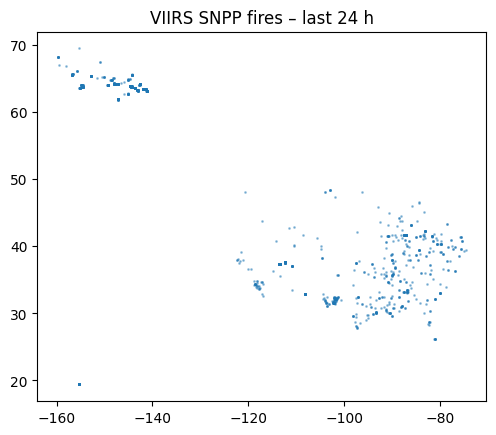

In [7]:
import geopandas as gpd, matplotlib.pyplot as plt
gdf = gpd.GeoDataFrame(
    fires,
    geometry=gpd.points_from_xy(fires.longitude, fires.latitude),
    crs="EPSG:4326"
)
ax = gdf.plot(markersize=1, alpha=0.4)
ax.set_title("VIIRS SNPP fires – last 24 h")
plt.show()
